# Time Series Bikes   
Credits https://www.oreilly.com/library/view/python-data-science/9781491912126/


In [3]:
import pandas as pd
import numpy as np
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4403k    0 4403k    0     0  1400k      0 --:--:--  0:00:03 --:--:-- 1400k


In [4]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [6]:
data.columns = ['Total','West', 'East']
# data['Total'] = data.eval('West + East')

In [7]:
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [8]:
data.dropna().describe()

,Total,West,East
count,141400.000000,141400.00000,141400.000000
mean,111.169434,50.61628,60.553154
std,141.999671,65.46336,88.279627
min,0.000000,0.00000,0.000000
25%,14.000000,6.00000,7.000000
50%,60.000000,28.00000,30.000000
75%,145.000000,68.00000,74.000000
max,1097.000000,698.00000,850.000000


In [9]:
%matplotlib inline
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

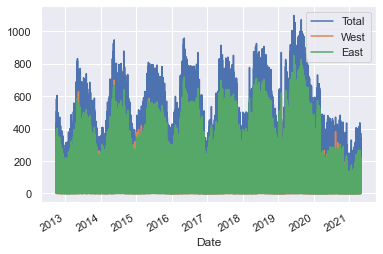

In [12]:
data.plot()


<AxesSubplot:xlabel='Date'>

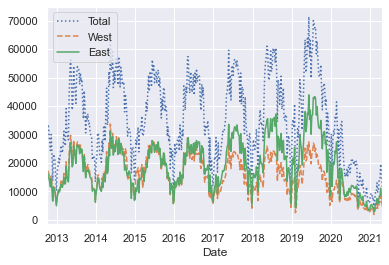

In [13]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])

<AxesSubplot:xlabel='Date'>

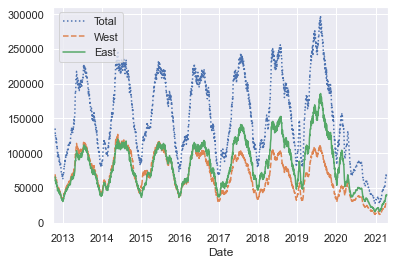

In [15]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])

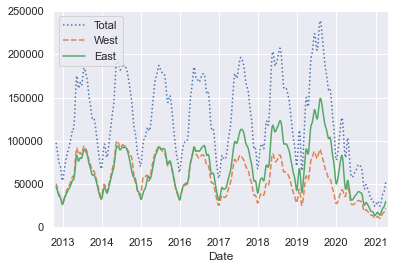

In [16]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

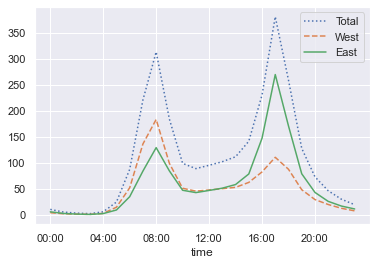

In [17]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

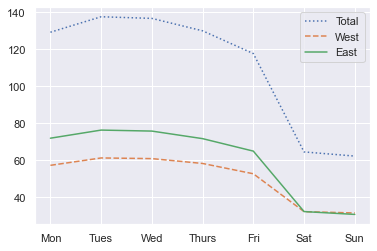

In [18]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);